[[9.99999945e-01 5.97537738e-09 4.89230148e-08]
 [9.99639097e-01 2.71059012e-06 3.58192238e-04]
 [9.99904089e-01 9.20328613e-05 3.87774946e-06]
 ...
 [9.97566047e-01 1.34314835e-06 2.43260948e-03]
 [9.99847927e-01 9.10852284e-07 1.51161746e-04]
 [9.99997826e-01 7.45692124e-08 2.09895922e-06]]


Text(0.5, 0.98, '展示GMM强大的聚类效果')

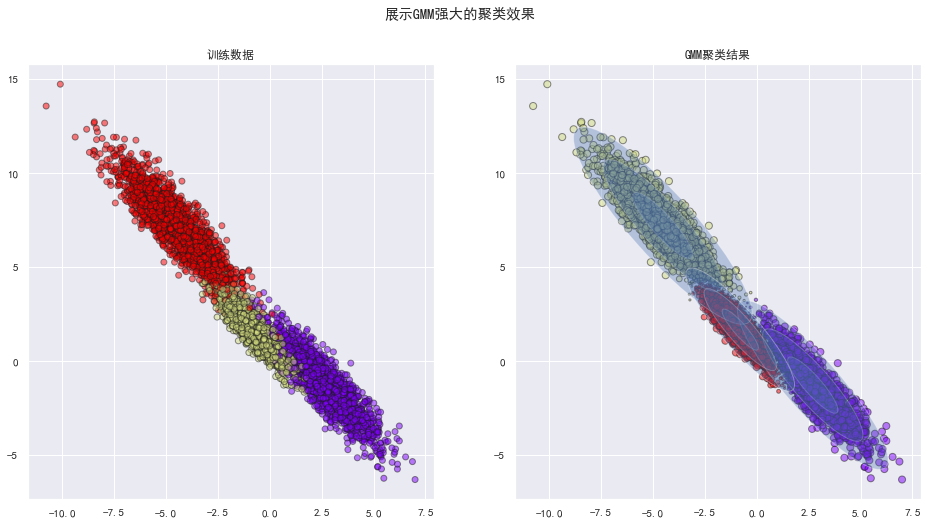

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_blobs, make_moons, load_digits
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

sns.set()
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)


n_clusters = 3
juleidata = pd.read_csv('001.csv')
data=juleidata.iloc[:,1:3]
xtrain=juleidata.iloc[:5801,1:3]
xtest=juleidata.iloc[5800:6000,1:3]

# xtrain['x0']=1
data2=xtrain.values
ytrain=juleidata.iloc[:5801,3]

rng = np.random.RandomState(seed=13)
x_train = np.dot(data2, rng.randn(2, 2))

model = GaussianMixture(n_components=n_clusters, covariance_type='full')
model.fit(x_train)

y_pred = model.predict(x_train)
y_prob = model.predict_proba(x_train)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # type: plt.Figure, list
ax_data = axs[0]  # type: plt.Axes
ax_pred = axs[1]  # type: plt.Axes
cm = plt.cm.get_cmap('rainbow', lut=4)

ax_data.scatter(x=x_train[:, 0], y=x_train[:, 1], c=ytrain, edgecolors='k', alpha=0.5, cmap=cm)
ax_data.set_title('训练数据')

ax_pred.scatter(
    x=x_train[:, 0], y=x_train[:, 1], c=y_pred, s=50 * y_prob.max(axis=1) ** 4,
    edgecolors='k', alpha=0.5, cmap=cm,
)
for pos, cov, w in zip(model.means_, model.covariances_, model.weights_):  # 椭圆的画法就照抄书本了
    u, s, vt = np.linalg.svd(cov)
    angle = np.degrees(np.arctan2(u[1, 0], u[0, 0]))
    width, height = 2 * np.sqrt(s)
    for nsig in range(1, 4):
        ax_pred.add_patch(Ellipse(
            pos, nsig * width, nsig * height, angle,
            alpha=w,
        ))
ax_pred.set_title('GMM聚类结果')

fig.suptitle('展示GMM强大的聚类效果')
